In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Make output reproducable
np.random.seed(7)
import os

import matplotlib as mp
mp.use('nbagg')
import matplotlib.pyplot as plt

os.sys.path.append('../Pilot2/P2B1/')
import helper

Using Theano backend.


In [3]:
(X, nbrs_all, resnums) = helper.get_data_arrays('../Pilot2/common/generate_datasets/run16/3k_run16_10us.35fs-DPPC.20-DIPC.60-CHOL.20_chunk_15_outof_29.npz')

print(X.dtype.names)

# Normalizing the data
Xnorm = np.concatenate([X[:, :, :, 0:3]/350., X[:, :, :, 3:8], X[:, :, :, 8:]/10.], axis=3)
# Select a random frame to test
random_frame = np.random.randint(len(Xnorm))

# Format data for the append functions
nbrs = nbrs_all[random_frame]
x_absolute = Xnorm[random_frame].reshape(Xnorm.shape[1], -1)  # For append_nbrs
x_relative = Xnorm[random_frame].reshape(Xnorm.shape[1], 12, -1)  # For append_nbrs_relative

print "x_absolute shape: ", x_absolute.shape
print "x_relative shape: ", x_relative.shape

None
x_absolute shape:  (3040, 240)
x_relative shape:  (3040, 12, 20)


# Plot neighborhood molecules

1. Perform a sanity check test on the outputs of the two functions by plotting positions of molecules with their neighbors. You can use the same bead for all molecules or the Center of Mass

2. Compare the relative positions of neighbors from both function and test if the the relative distances in the second one are working correctly. Would like to see an output for beads of individual molecules and the neighborhood 

(3040, 6, 12, 20)


<IPython.core.display.Javascript object>


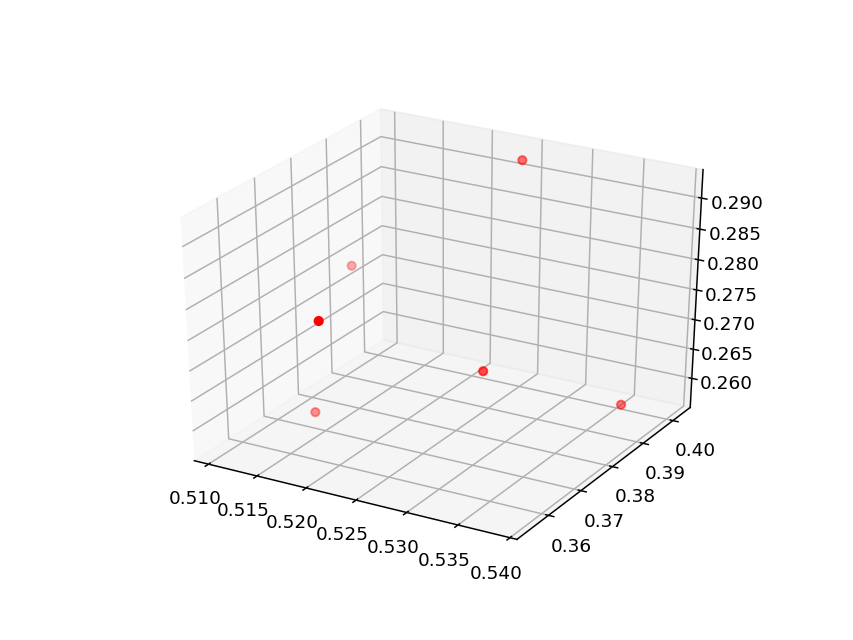

[0.019881252221243286, 0.02536961052415465, 0.018985115104424525, 0.03674163258909026]


In [38]:
#number of neighbors (Arbitray number, since I wasnt sure how many to check against)
num_nbrs = 5

appnd_nbrs = helper.append_nbrs(x_absolute, nbrs, num_nbrs)
appnd_nbrs_reshaped = appnd_nbrs.reshape(appnd_nbrs.shape[0], num_nbrs+1, 12, 20)
print(appnd_nbrs_reshaped.shape)

## Plot the absolute neighbors on 3d plane for molecule 0, bead 0, nbrs 0:5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = appnd_nbrs_reshaped[0, 0:, 0, 0]
y = appnd_nbrs_reshaped[0, 0:, 0, 1]
z = appnd_nbrs_reshaped[0, 0:, 0, 2]
ax.scatter(x, y, z, c='r', marker='o')

plt.show()

# Holder for absolute Points
abs_points = []
sub = appnd_nbrs_reshaped

# List of points as numpy array for computing distance.
for i in range(num_nbrs):
    abs_points.append(np.array((sub[0,i,0,0], sub[0,i,0,1], sub[0,i,0,2])))


# Generate the distance between neihbors of molecule 0 and bead 0 between the 5 
# neighbors computed in helper.append_nbrs
absolute_dist = [np.linalg.norm(abs_points[0]- x) for x in abs_points[1:]]


(3040, 6, 12, 20)


<IPython.core.display.Javascript object>


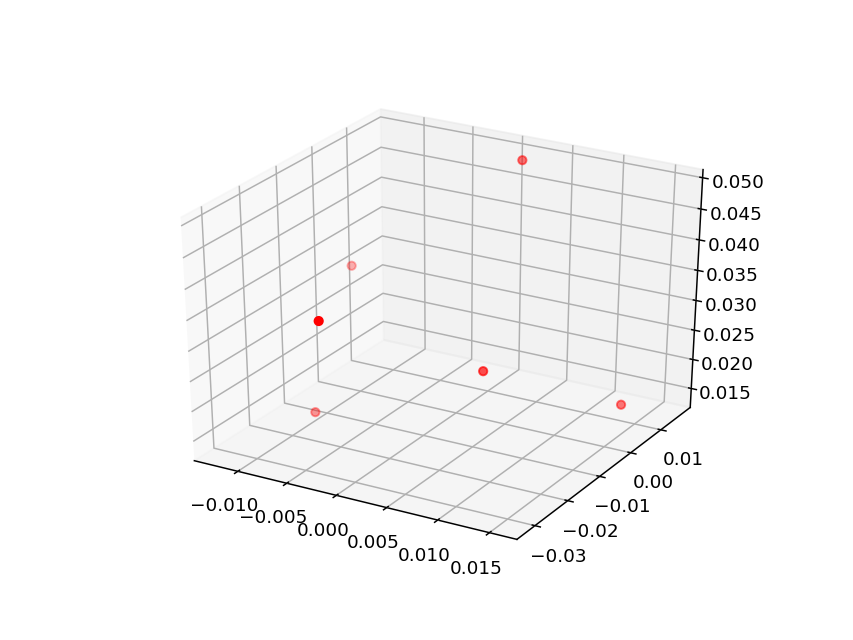

[0.019881252221243286, 0.02536961052415465, 0.018985115104424525, 0.03674163258909026]


In [41]:
appnd_nbrs_rltv = helper.append_nbrs_relative(x_relative, nbrs, num_nbrs)
appnd_nbrs_rltv_reshaped = appnd_nbrs_rltv.reshape(appnd_nbrs_rltv.shape[0], num_nbrs + 1, 12, 20)
print(appnd_nbrs_rltv_reshaped.shape)

## Plot the relative neighbors on 3d plane for molecule 0, bead 0, nbrs 0:5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = appnd_nbrs_rltv_reshaped[0, 0:, 0, 0]
y = appnd_nbrs_rltv_reshaped[0, 0:, 0, 1]
z = appnd_nbrs_rltv_reshaped[0, 0:, 0, 2]
ax.scatter(x, y, z, c='r', marker='o')

plt.show()

#Holder for absolute Points
rel_points = []
sub = appnd_nbrs_rltv_reshaped

for i in range(num_nbrs):
    rel_points.append(np.array((sub[0,i,0,0], sub[0,i,0,1], sub[0,i,0,2])))

# Generate the distance between neihbors of molecule 0 and bead 0 between the 5 
# neighbors computed in helper.append_nbrs_relative
relative_dist = [np.linalg.norm(rel_points[0]- x) for x in rel_points[1:]]


In [46]:
# Compare the Absolute and relative distances
print('Absolute Distances: ' + str(absolute_dist))
print('Relative Distacne: ' + str(relative_dist))

Absolute Distances: [0.019881252221243286, 0.02536961052415465, 0.018985115104424525, 0.03674163258909026]
Relative Distacne: [0.019881252221243286, 0.02536961052415465, 0.018985115104424525, 0.03674163258909026]
